In [21]:
# install package with datasets from the UC Irvine Machine Learning Repository
# https://github.com/uci-ml-repo/ucimlrepo

!pip3 install -U ucimlrepo

In [22]:
from ucimlrepo import list_available_datasets

# check which datasets can be imported

list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [23]:
list_available_datasets(search='Credit Approval')

------------------------------------------------------------------------
The following datasets are available for search query "credit approval":
------------------------------------------------------------------------
Dataset Name                            ID    
------------                            --    
Credit Approval                         27    
Statlog (Australian Credit Approval)    143   



In [24]:
from ucimlrepo import fetch_ucirepo

# fetch dataset

credit_approval = fetch_ucirepo(id=27)

# alternatively: fetch_ucirepo(name='Credit Approval')

In [25]:
# metadata

for key, value in credit_approval.metadata.items():
  if isinstance(value, dict):
    print(f"{key}:")
    for key_additional, value_additional in value.items():
      print(f"  {key_additional}: {value_additional}")
  else:
    print(f"{key}: {value}")

uci_id: 27
name: Credit Approval
repository_url: https://archive.ics.uci.edu/dataset/27/credit+approval
data_url: https://archive.ics.uci.edu/static/public/27/data.csv
abstract: This data concerns credit card applications; good mix of attributes
area: Business
tasks: ['Classification']
characteristics: ['Multivariate']
num_instances: 690
num_features: 15
feature_types: ['Categorical', 'Integer', 'Real']
demographics: []
target_col: ['A16']
index_col: None
has_missing_values: yes
missing_values_symbol: NaN
year_of_dataset_creation: 1987
last_updated: Wed Aug 23 2023
dataset_doi: 10.24432/C5FS30
creators: ['J. R. Quinlan']
intro_paper: None
additional_info:
  summary: This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.
  
This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values

In [26]:
# variable information

print(credit_approval.variables)

   name     role         type demographic description units missing_values
0   A16   Target  Categorical        None        None  None             no
1   A15  Feature   Continuous        None        None  None             no
2   A14  Feature   Continuous        None        None  None            yes
3   A13  Feature  Categorical        None        None  None             no
4   A12  Feature  Categorical        None        None  None             no
5   A11  Feature   Continuous        None        None  None             no
6   A10  Feature  Categorical        None        None  None             no
7    A9  Feature  Categorical        None        None  None             no
8    A8  Feature   Continuous        None        None  None             no
9    A7  Feature  Categorical        None        None  None            yes
10   A6  Feature  Categorical        None        None  None            yes
11   A5  Feature  Categorical        None        None  None            yes
12   A4  Feature  Categor

In [27]:
import pandas as pd

# data (as pandas dataframes)

x = credit_approval.data.features
y = credit_approval.data.targets

# reversing columns for obtaining order like A1,A2,...,A16

x.columns = x.columns[::-1]

# concat into one single dataframe

data = pd.concat([x, y], axis=1)

# showing concatenated dataframe

data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,0,202.0,g,f,1,t,t,1.25,v,w,g,u,0.000,30.83,b,+
1,560,43.0,g,f,6,t,t,3.04,h,q,g,u,4.460,58.67,a,+
2,824,280.0,g,f,0,f,t,1.50,h,q,g,u,0.500,24.50,a,+
3,3,100.0,g,t,5,t,t,3.75,v,w,g,u,1.540,27.83,b,+
4,0,120.0,s,f,0,f,t,1.71,v,w,g,u,5.625,20.17,b,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,260.0,g,f,0,f,f,1.25,h,e,p,y,10.085,21.08,b,-
686,394,200.0,g,t,2,t,f,2.00,v,c,g,u,0.750,22.67,a,-
687,1,200.0,g,t,1,t,f,2.00,ff,ff,p,y,13.500,25.25,a,-
688,750,280.0,g,f,0,f,f,0.04,v,aa,g,u,0.205,17.92,b,-



Number of passed and rejected aplications:

- : 383 (55.5%)
+ : 307 (44.5%)


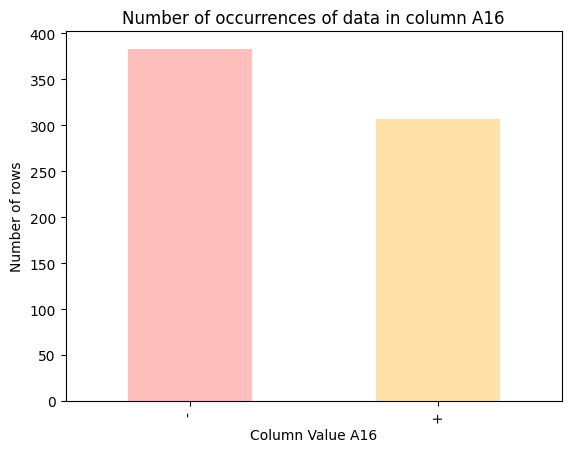

In [28]:
print("\nNumber of passed and rejected aplications:\n")

# number of all rows

total_cases = data.shape[0]

# counting unique symbol + and - for target column

class_distribution = data['A16'].value_counts()

# table with first seven colors from colormap Pastel1

colors = ['#fcbfbc', '#ffe1a8', '#f9f5a0', '#cfe2f3', '#a6d6e8', '#c5e1a5', '#f5c1e0']

# printing number of + and - in A16 column with percentage value

for cls, count in class_distribution.items():
    percentage = (count / total_cases) * 100
    print(f"{cls} : {count} ({percentage:.1f}%)")

# plot for passed and rejected aplications

plot_class_distribution = class_distribution.plot(kind='bar', color=colors, title="Number of occurrences of data in column A16", xlabel='Column Value A16', ylabel='Number of rows')

Missing Values:

37 cases (5.4%) have one or more missing values. The missing values from particular attributes are:
A2: 13
A9: 9
A10: 9
A11: 6
A12: 6
A14: 12
A15: 12


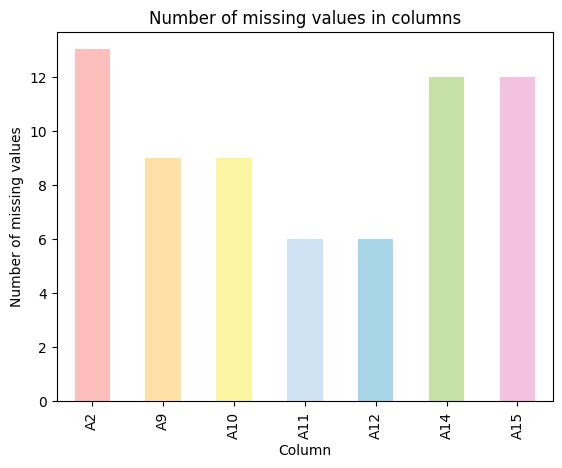

In [29]:
# counting missing values

missing_values = data.isnull().sum()

# droping columns that have none of missing values

missing_attributes = missing_values[missing_values > 0]

# cases with missing data

missing_cases = data[data.isnull().any(axis=1)]

# number of cases with missing data

missing_cases_count = missing_cases.shape[0]

# counting percentage value of missing data

missing_percentage = (missing_cases_count / total_cases) * 100

# printing general result in missing data

print("Missing Values:\n")

print(f"{missing_cases_count} cases ({missing_percentage:.1f}%) have one or more missing values. The missing values from particular attributes are:")

# printing number of missing data in rows in particullar columns

for col in missing_attributes.index:
    print(f"{col}: {missing_attributes[col]}")

# plot for missing values

plot_missing_values = missing_attributes.plot(kind='bar', color=colors, title="Number of missing values ​​in columns", xlabel='Column', ylabel='Number of missing values')